In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Data Loading
X_train = pd.read_csv("X_train.csv") 
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv") 

#### Building the model

In [3]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50


90/90 [==============================] - 1s 3ms/step - loss: 163901.8594 - accuracy: 0.5420 - val_loss: 39888.4805 - val_accuracy: 0.6012
Epoch 2/50
90/90 [==============================] - 0s 1ms/step - loss: 53914.8164 - accuracy: 0.5434 - val_loss: 27663.0371 - val_accuracy: 0.5857
Epoch 3/50
90/90 [==============================] - 0s 1ms/step - loss: 27944.7676 - accuracy: 0.5396 - val_loss: 41466.3477 - val_accuracy: 0.3894
Epoch 4/50
90/90 [==============================] - 0s 1ms/step - loss: 33446.3242 - accuracy: 0.5333 - val_loss: 29307.4023 - val_accuracy: 0.6324
Epoch 5/50
90/90 [==============================] - 0s 1ms/step - loss: 24123.8281 - accuracy: 0.5521 - val_loss: 19288.0020 - val_accuracy: 0.6511
Epoch 6/50
90/90 [==============================] - 0s 1ms/step - loss: 26308.7832 - accuracy: 0.5458 - val_loss: 26301.6074 - val_accuracy: 0.6417
Epoch 7/50
90/90 [==============================] - 0s 1ms/step - loss: 26645.7891 - accuracy: 0.5396 - val_l

In [6]:
model.evaluate(X_train, y_train)


101/101 [==============================] - 0s 946us/step - loss: 25824.5020 - accuracy: 0.6195


[25824.501953125, 0.6194939017295837]

In [7]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 1ms/step - loss: 27569.1582 - accuracy: 0.6320


[27569.158203125, 0.632022500038147]

In [8]:
# Predict on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

34/34 [==============================] - 0s 788us/step
ROC AUC Score: 0.5107559880239521


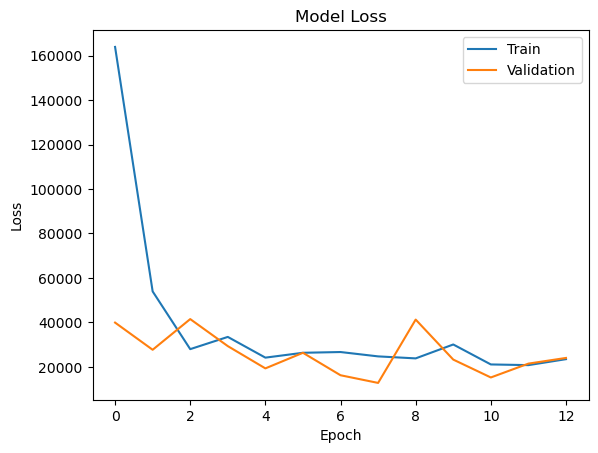

In [9]:
#plot the training and validation curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()